**TITANIC SURVIVAL PREDICTION**

Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket class, fare, cabin, and whether or not they survived.

**IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**IMPORTING DATASET**

In [ ]:
df = pd.read_csv("/content/Titanic-Dataset.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**From above cell it is clear there are few missing values in age column**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


<Axes: xlabel='Survived', ylabel='count'>

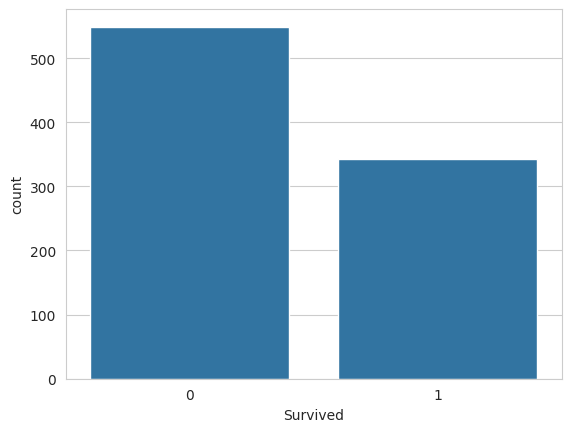

In [68]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",data=df)

In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [ ]:
df['Pclass'].value_counts()

,count
Pclass,
3,491
1,216
2,184


<Axes: xlabel='Pclass', ylabel='count'>

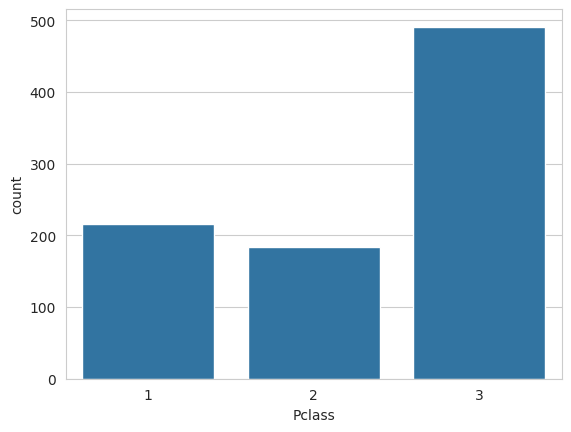

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x="Pclass",data=df )

<Axes: xlabel='Survived', ylabel='count'>

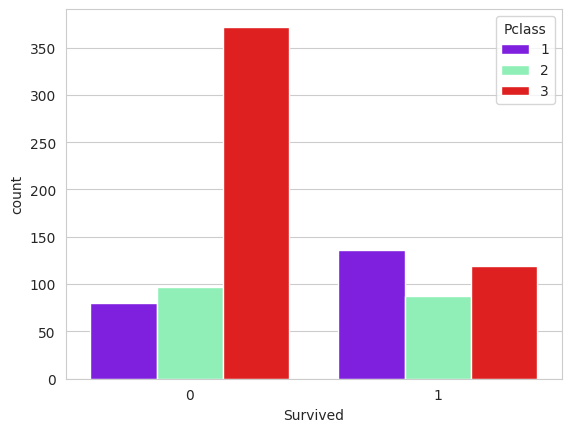

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=df, palette='rainbow')

In [72]:
#count of survivors in each Pclass
df[df['Survived'] == 1 ]['Pclass'].value_counts()

,count
Pclass,
1,136
3,119
2,87


In [73]:
#count of non-survivors in each Pclass
df[df['Survived'] == 0]['Pclass'].value_counts()

,count
Pclass,
3,372
2,97
1,80


In [ ]:
df['Sex'].value_counts()

,count
Sex,
1,577
0,314


<Axes: xlabel='Sex', ylabel='count'>

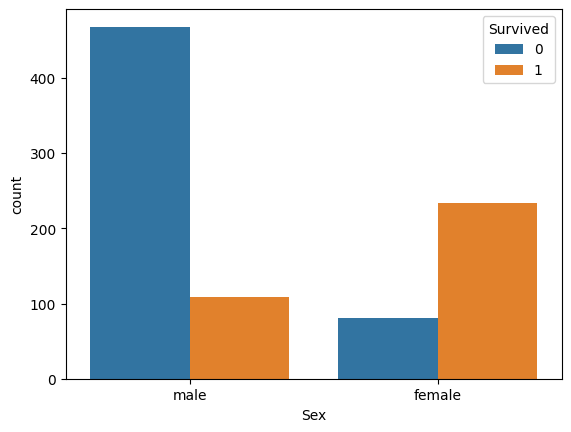

In [ ]:
sns.countplot(x=df['Sex'],hue=df['Survived'])

In [ ]:
#look at survival rate by sex
df.groupby('Sex')[('Survived')].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['Sex'] = labelencoder.fit_transform(df['Sex'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df['Sex'],df['Survived']

(0      1
 1      0
 2      0
 3      0
 4      1
       ..
 886    1
 887    0
 888    0
 889    1
 890    1
 Name: Sex, Length: 891, dtype: int64,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df.replace({'Sex':{'male' : 0, 'female' :1}}, inplace= True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,8.0500,NaN,S


In [ ]:
X=df[['Pclass','Sex']]
Y=df['Survived']

In [ ]:
X , Y

(     Pclass  Sex
 0         3    1
 1         1    0
 2         3    0
 3         1    0
 4         3    1
 ..      ...  ...
 886       2    1
 887       1    0
 888       3    0
 889       1    1
 890       3    1
 
 [891 rows x 2 columns],
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 886    0
 887    1
 888    0
 889    1
 890    0
 Name: Survived, Length: 891, dtype: int64)

**MODEL TRAINING**

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test ,Y_train , Y_test = train_test_split(X,Y , test_size =0.2 , random_state =0)

In [ ]:
print(X.shape , X_train.shape , X_test.shape)

(891, 2) (712, 2) (179, 2)


In [ ]:
print(Y.shape , Y_train.shape , Y_test.shape)

(891,) (712,) (179,)


In [ ]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state = 0)
log.fit(X_train , Y_train)

LogisticRegression(random_state=0)

**MODEL PREDICTION**

In [62]:
X_test_prediction = log.predict(X_test)
print(X_test_prediction)

[0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0
 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 1 0 1
 1 0 0 1 1 0 1 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0]


In [ ]:
print(Y_test)

495    0
648    0
278    0
31     1
255    1
      ..
780    1
837    0
215    1
833    0
372    0
Name: Survived, Length: 179, dtype: int64


In [65]:
X_train_prediction = log.predict(X_train)
print(X_train_prediction)

[1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0
 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 1 0 0
 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 1 0 0
 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 1 1 1 0 0 0 0 1 0 0
 1 0 0 1 1 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0
 1 0 1 1 0 0 1 1 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1 0 1 0
 0 1 0 0 1 0 0 1 1 0 0 0 

In [66]:
print(Y_train)

140    0
439    0
817    0
378    0
491    0
      ..
835    1
192    1
629    0
559    1
684    0
Name: Survived, Length: 712, dtype: int64


In [67]:
#accuracy
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(X_train_prediction , Y_train)
test_accuracy = accuracy_score(X_test_prediction , Y_test)
print("Accuracy scores of training and test data are ",train_accuracy ,'and' , test_accuracy , 'respectively')

Accuracy scores of training and test data are  0.7865168539325843 and 0.7877094972067039 respectively
